### 네이버뮤직 top100 가져와서 데이터 프레임형식으러 만들기

In [1]:
import pandas as pd
import requests as req
from bs4 import BeautifulSoup as bs

In [2]:
url='https://music.naver.com/listen/top100.nhn?domain=TOTAL_V2'
res=req.get(url)
res

<Response [200]>

In [3]:
soup = bs(res.text,'html.parser')

In [4]:
artist_list=[]
title_list=[]
rank_list=[]

In [5]:
"""아티스트"""
for i in range(50):
    artist_list.append(soup.select('td._artist > a')[i].text.strip())

"""
for i in soup.select('td._artist')[1:]:
    artist.append(i.text.strip())

"""

"\nfor i in soup.select('td._artist')[1:]:\n    artist.append(i.text.strip())\n\n"

In [6]:
"""곡명"""
for i in range(50):
    title_list.append(soup.select('td.name > a.title')[i].text)

In [7]:
"""순위"""
for i in range(50):
    rank_list.append(soup.select('td.ranking')[i].text)

In [8]:
"""
rank = soup.select('td.ranking')
title = soup.select('td.name > a.title')
artist = soup.select('td._artist > a')

for i in range(50):
    artist_list.append(artist[i].text.strip())
    title_list.append(title[i].text)
    rank_list.append(rank[i].text)
"""

"\nrank = soup.select('td.ranking')\ntitle = soup.select('td.name > a.title')\nartist = soup.select('td._artist > a')\n\nfor i in range(50):\n    artist_list.append(artist[i].text.strip())\n    title_list.append(title[i].text)\n    rank_list.append(rank[i].text)\n"

In [9]:
"""
for r, t, a in zip(rank,title,artist):
    rank_list.append(r.text)
    title_list.append(t.text)
    artist_list.append(a.text.strip())
"""

'\nfor r, t, a in zip(rank,title,artist):\n    rank_list.append(r.text)\n    title_list.append(t.text)\n    artist_list.append(a.text.strip())\n'

In [10]:
df = pd.DataFrame({'순위':rank_list,'곡명':title_list,'아티스트':artist_list})
df.set_index('순위', inplace=True)

In [11]:
df

,곡명,아티스트
순위,,
1,술이 문제야,장혜진
2,헤어져줘서 고마워,벤
3,2002,Anne-Marie
4,Snapping,청하
5,그대라는 시,태연 (TAEYEON)
6,Speechless (Full),Naomi Scott
7,사랑에 연습이 있었다면 (Prod. 2soo),임재현
8,너에게 못했던 내 마지막 말은,다비치
9,작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey),방탄소년단


###  영화 제목 평점 수집해서 scv로 저장하기

In [12]:
url='https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190729'
res=req.get(url)
res

<Response [200]>

In [13]:
soup = bs(res.text,'html.parser')

In [14]:
title = soup.select('div.tit5 > a')
grade = soup.select('td.point')
len(title)

39

In [15]:
rank_list = []
title_list= []
grade_list = []
for i in range(len(title)):
    rank_list.append(i+1)
    title_list.append(title[i].text)
    grade_list.append(grade[i].text)

In [16]:
df = pd.DataFrame({'순위':rank_list,'영화명':title_list,'평점':grade_list})
df.set_index('순위', inplace=True)
df

,영화명,평점
순위,,
1,알라딘,9.43
2,어벤져스: 엔드게임,9.39
3,아이 캔 스피크,9.37
4,레드슈즈,9.36
5,모던 타임즈,9.31
6,뽀로로 극장판 보물섬 대모험,9.28
7,교회오빠,9.27
8,이웃집 토토로,9.26
9,토이 스토리 4,9.09


In [17]:
df.to_csv("naver_movie_info.csv")
data=pd.read_csv('naver_movie_info.csv',index_col=0, encoding='utf-8')
data

,영화명,평점
순위,,
1,알라딘,9.43
2,어벤져스: 엔드게임,9.39
3,아이 캔 스피크,9.37
4,레드슈즈,9.36
5,모던 타임즈,9.31
6,뽀로로 극장판 보물섬 대모험,9.28
7,교회오빠,9.27
8,이웃집 토토로,9.26
9,토이 스토리 4,9.09


### 날짜별 영화 가져와서 시각화하기!

##### pandas를 이용한 날짜 생성

In [18]:
date = pd.date_range('2018-05-29','2019-01-09', freq='d')
date

DatetimeIndex(['2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04', '2018-06-05',
               '2018-06-06', '2018-06-07',
               ...
               '2018-12-31', '2019-01-01', '2019-01-02', '2019-01-03',
               '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07',
               '2019-01-08', '2019-01-09'],
              dtype='datetime64[ns]', length=226, freq='D')

In [19]:
"""URL에 맞게 날짜 형식 변경"""
date_list = []
for day in date:
    date_list.append(day.strftime('%Y%m%d'))


In [20]:
from tqdm import tqdm_notebook

In [21]:
day_list = []
title_list = []
grade_list = []
for day in tqdm_notebook(date_list):
    url='https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date='+day
    res=req.get(url)
    res

    soup = bs(res.text,'html.parser')

    title = soup.select('div.tit5 > a')
    grade = soup.select('td.point')
    for index in range(len(title)): #영화개수가 날마다 달라서
        day_list.append(day)
        title_list.append(title[index].text)
        grade_list.append(grade[index].text)

In [22]:
len(grade_list)

9683

In [23]:
data = pd.DataFrame({'날짜':day_list,'영화명':title_list,'평점':grade_list})
data.set_index('날짜', inplace=True)

In [24]:
data

,영화명,평점
날짜,,
20180529,당갈,9.62
20180529,위대한 쇼맨,9.37
20180529,킹 오브 프리즘 프라이드 더 히어로,9.26
20180529,러빙 빈센트,9.19
20180529,피터 래빗,9.13
20180529,박하사탕,9.08
20180529,비밥바룰라,9.03
20180529,"그날, 바다",8.99
20180529,어벤져스: 인피니티 워,8.96


In [25]:
data.to_csv('naver_data.csv')

In [26]:
#그래프 만들기 

In [27]:
data = pd.read_csv("naver_data.csv",     #데이터 불러오기 
                   parse_dates=["날짜"]) #날짜는 날짜데이터로 가져오는게 편하니까   (그리고 쉽게 년 월 일 잘를수있다)

In [28]:
data

,날짜,영화명,평점
0,2018-05-29,당갈,9.62
1,2018-05-29,위대한 쇼맨,9.37
2,2018-05-29,킹 오브 프리즘 프라이드 더 히어로,9.26
3,2018-05-29,러빙 빈센트,9.19
4,2018-05-29,피터 래빗,9.13
5,2018-05-29,박하사탕,9.08
6,2018-05-29,비밥바룰라,9.03
7,2018-05-29,"그날, 바다",8.99
8,2018-05-29,어벤져스: 인피니티 워,8.96
9,2018-05-29,소공녀,8.89


In [29]:
name_point_list=[]

for name in data["영화명"].unique():
    name_point_list.append([name,data[data["영화명"]==name]["평점"].mean()])

In [30]:
name_point_df = pd.DataFrame(name_point_list,columns=["영화명","평균평점"])

In [31]:
name_point_df.sort_values(by='평균평점',
                         ascending=False,  # 올림차순
                         inplace=True)  

In [32]:
name_point_df.reset_index(drop=True,inplace=True)

In [33]:
name_point_df

,영화명,평균평점
0,보헤미안 랩소디,9.575634
1,베일리 어게인,9.562727
2,아일라,9.555185
3,당갈,9.541783
4,덕구,9.460000
5,번 더 스테이지: 더 무비,9.458000
6,폴란드로 간 아이들,9.454068
7,헌터 킬러,9.454063
8,원더,9.411379
9,허스토리,9.407595


In [34]:
name_ranking_list = name_point_df.iloc[:6,0].values

In [35]:
name_ranking_list

array(['보헤미안 랩소디', '베일리 어게인', '아일라', '당갈', '덕구', '번 더 스테이지: 더 무비'],
      dtype=object)

In [36]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [37]:
import seaborn as sns

In [38]:
#그래프 그려보기

concat_df = pd.DataFrame()
for name in name_ranking_list:
    df2 = data[data['영화명']== name]
    concat_df=pd.concat([concat_df,df2], axis=0)

In [40]:
import matplotlib.pyplot as plt

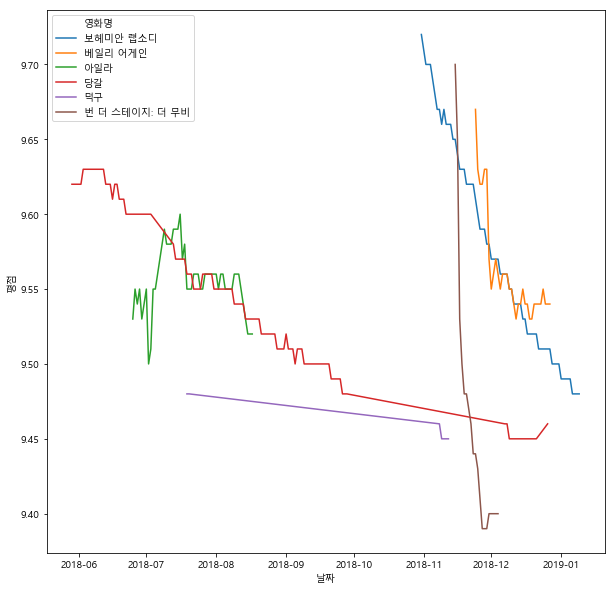

In [45]:
plt.figure(figsize=(10,10))
sns.lineplot('날짜','평점',hue='영화명', data=concat_df) #(x='날짜',y='평균')이케 써도 가능
plt.legend(loc=2)